In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, auc, roc_curve

In [4]:
# Loads the Telco Customer Churn dataset from a CSV file into a pandas DataFrame.
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [7]:
# Displays the first five rows of the DataFrame to preview the dataset.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
# Provides a concise summary of the DataFrame including column names, data types, and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Checks for missing values in each column and returns the total count of null values per column.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# Identifies duplicate rows in the DataFrame and returns the total number of duplicated records.
df.duplicated().sum()

np.int64(0)

Visualization

In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

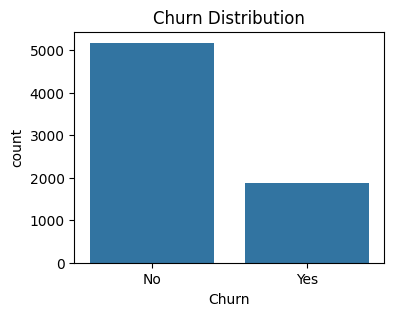

In [21]:
# Creates a count plot for the 'Churn' column with a title to visualize the distribution of churned vs non-churned customers.
plt.figure(figsize=(4,3))                  # Sets the figure size for the plot.
sns.countplot(x='Churn', data=df)          # Plots the count of each category in the 'Churn' column.
plt.title("Churn Distribution")            # Adds a title to the plot.
plt.show()                                 # Displays the count plot.

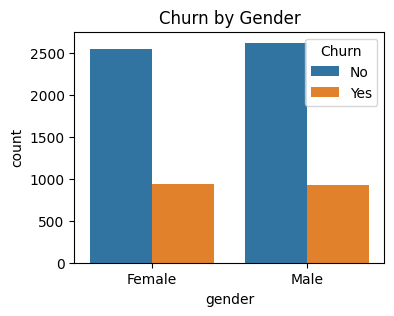

In [24]:
# Creates a count plot to visualize customer churn distribution across genders with separate bars for churn status.
plt.figure(figsize=(4,3))                  # Sets the figure size for the plot.
sns.countplot(x='gender', hue='Churn', data=df)  # Plots counts of 'gender' split by 'Churn' categories.
plt.title("Churn by Gender")               # Adds a title to the plot.
plt.show()                                 # Displays the count plot.

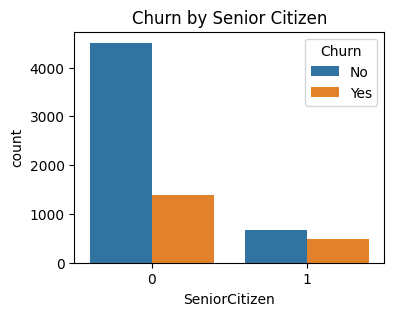

In [25]:
# Creates a count plot to visualize customer churn distribution based on whether they are senior citizens.
plt.figure(figsize=(4,3))                        # Sets the figure size for the plot.
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)  # Plots counts of 'SeniorCitizen' split by 'Churn' categories.
plt.title("Churn by Senior Citizen")            # Adds a title to the plot.
plt.show()                                      # Displays the count plot.

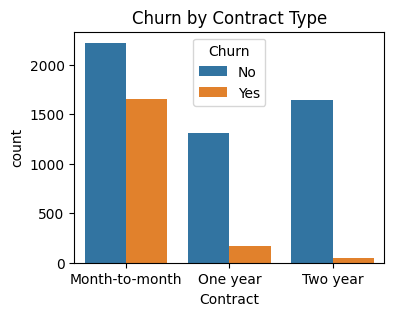

In [26]:
# Creates a count plot to visualize customer churn distribution across different contract types.
plt.figure(figsize=(4,3))                  # Sets the figure size for the plot.
sns.countplot(x='Contract', hue='Churn', data=df)  # Plots counts of 'Contract' types split by 'Churn' categories.
plt.title("Churn by Contract Type")       # Adds a title to the plot.
plt.show()                                # Displays the count plot.

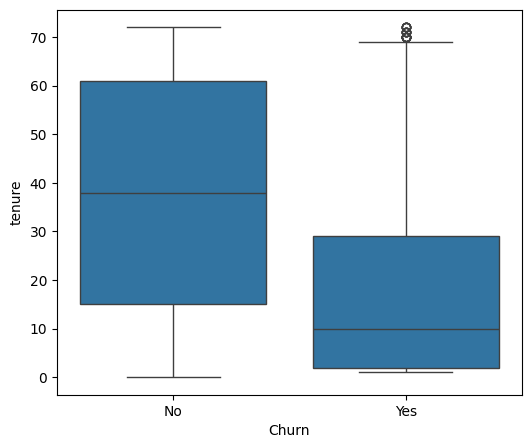

In [30]:
# Creates a boxplot to visualize the distribution of customer tenure for each churn category.
plt.figure(figsize=(6,5))                  # Sets the figure size for the plot.
sns.boxplot(x='Churn', y='tenure', data=df)  # Plots a boxplot of 'tenure' grouped by 'Churn' categories.
plt.show()                                 # Displays the boxplot.

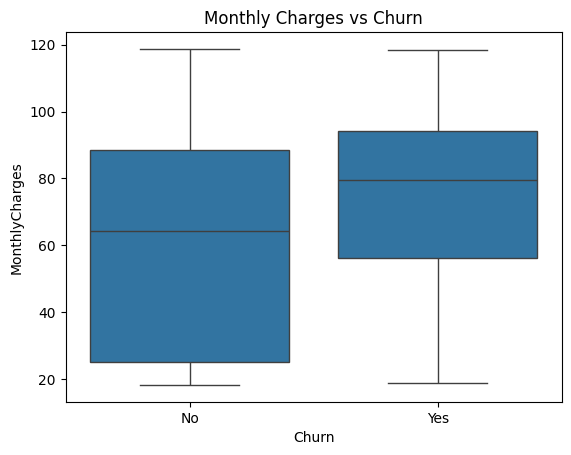

In [36]:
# Creates a boxplot to visualize the distribution of monthly charges for each churn category with a title.
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)  # Plots a boxplot of 'MonthlyCharges' grouped by 'Churn'.
plt.title("Monthly Charges vs Churn")               # Adds a title to the plot.
plt.show()                                          # Displays the boxplot.

In [ ]:
# Converts the 'TotalCharges' column to numeric values, coercing errors to NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Checks how many missing values (NaN) exist in the 'TotalCharges' column.
df['TotalCharges'].isnull().sum()

# Fills the missing values in 'TotalCharges' with the median value of the column.
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']], annot=True)

<Axes: >